**1**. (25 points)

Generate the DataFrame `df` using `pendulum`, `itertools` and `pandas`. Note that th locales used are English, French and Russian.

In [6]:
df = pd.read_csv('schedule.csv')
df

,Day,Homework due,Subject
0,"24 (Sa) August, 2019 12:08:00 PM",1 week before,BIOS 823
1,"25 (Su) August, 2019 12:08:00 PM",6 jours avant,BIOS 824
2,"26 (Mo) August, 2019 12:08:00 PM",5 дней до,BIOS 823
3,"27 (Tu) August, 2019 12:08:00 PM",4 days before,BIOS 824
4,"28 (We) August, 2019 12:08:00 PM",3 jours avant,BIOS 823
5,"29 (Th) August, 2019 12:08:00 PM",2 дня до,BIOS 824
6,"30 (Fr) August, 2019 12:08:00 PM",1 day before,BIOS 823
7,"31 (Sa) August, 2019 12:08:00 PM",12 heures avant,BIOS 824


In [7]:
import pandas as pd
import pendulum
import arrow

In [8]:
fmt = 'DD(dd) MMMM, YYYY h:MM:SS A'
df=pd.DataFrame(columns=['Day','Homework due','Subject'])
df.Subject=['BIOS 823', 'BIOS 824']*4

locale=['en','fr','ru']*4

date = pendulum.datetime(2019, 8, 23, 12, 8)
today = pendulum.datetime(2019, 9, 1, 0, 8)

for index, row in df.iterrows():
    row['Day'] = date.add(days=index+1)
    row['Homework due' ] = row['Day'].diff_for_humans(today,locale=locale[index])
    row['Day'] = row['Day'].format(fmt)

df

,Day,Homework due,Subject
0,"24(Sa) August, 2019 12:08:00 PM",1 week before,BIOS 823
1,"25(Su) August, 2019 12:08:00 PM",6 jours avant,BIOS 824
2,"26(Mo) August, 2019 12:08:00 PM",5 дней до,BIOS 823
3,"27(Tu) August, 2019 12:08:00 PM",4 days before,BIOS 824
4,"28(We) August, 2019 12:08:00 PM",3 jours avant,BIOS 823
5,"29(Th) August, 2019 12:08:00 PM",2 дня до,BIOS 824
6,"30(Fr) August, 2019 12:08:00 PM",1 day before,BIOS 823
7,"31(Sa) August, 2019 12:08:00 PM",12 heures avant,BIOS 824


**2**. (25 points)

Given the DataFrame `df`, recreate the correlation plot shown using `seaborn`. Note the color mapping is `viridis`.

In [9]:
import numpy as np
import string

In [10]:
np.random.seed(123)
nrows = 10
ncols = 10
k = 6
xs = np.random.normal(0, 1, (nrows, ncols))
names = [''.join(np.random.choice(list(string.ascii_lowercase), k)) for i in range(10)]
df = pd.DataFrame(xs, columns=names)
df

,bdryox,fbsfcs,onzdso,wxjrdl,ylkdnx,zzoddo,vwqyxx,eefqyj,cfbfjp,ckedqd
0,-1.085631,0.997345,0.282978,-1.506295,-0.578600,1.651437,-2.426679,-0.428913,1.265936,-0.866740
1,-0.678886,-0.094709,1.491390,-0.638902,-0.443982,-0.434351,2.205930,2.186786,1.004054,0.386186
2,0.737369,1.490732,-0.935834,1.175829,-1.253881,-0.637752,0.907105,-1.428681,-0.140069,-0.861755
3,-0.255619,-2.798589,-1.771533,-0.699877,0.927462,-0.173636,0.002846,0.688223,-0.879536,0.283627
4,-0.805367,-1.727669,-0.390900,0.573806,0.338589,-0.011830,2.392365,0.412912,0.978736,2.238143
5,-1.294085,-1.038788,1.743712,-0.798063,0.029683,1.069316,0.890706,1.754886,1.495644,1.069393
6,-0.772709,0.794863,0.314272,-1.326265,1.417299,0.807237,0.045490,-0.233092,-1.198301,0.199524
7,0.468439,-0.831155,1.162204,-1.097203,-2.123100,1.039727,-0.403366,-0.126030,-0.837517,-1.605963
8,1.255237,-0.688869,1.660952,0.807308,-0.314758,-1.085902,-0.732462,-1.212523,2.087113,0.164441
9,1.150206,-1.267352,0.181035,1.177862,-0.335011,1.031114,-1.084568,-1.363472,0.379401,-0.379176


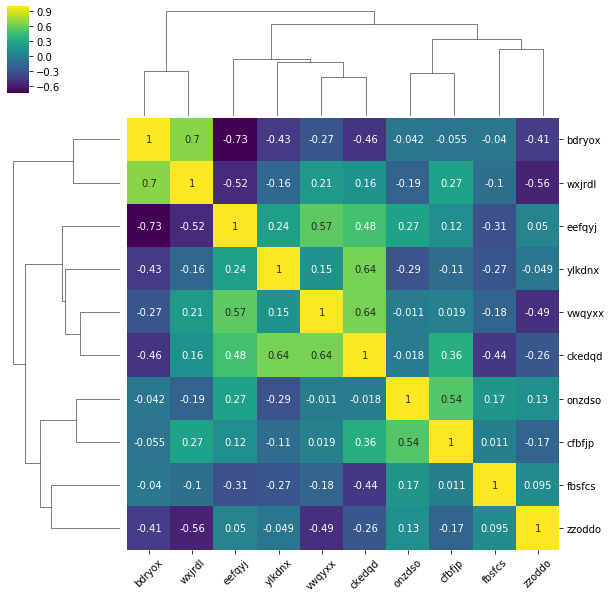

In [11]:
from IPython.display import Image
Image('corrplot.png')

[Text(0.5, 0, 'bdryox'),
 Text(1.5, 0, 'wxjrdl'),
 Text(2.5, 0, 'eefqyj'),
 Text(3.5, 0, 'ylkdnx'),
 Text(4.5, 0, 'vwqyxx'),
 Text(5.5, 0, 'ckedqd'),
 Text(6.5, 0, 'onzdso'),
 Text(7.5, 0, 'cfbfjp'),
 Text(8.5, 0, 'fbsfcs'),
 Text(9.5, 0, 'zzoddo')]

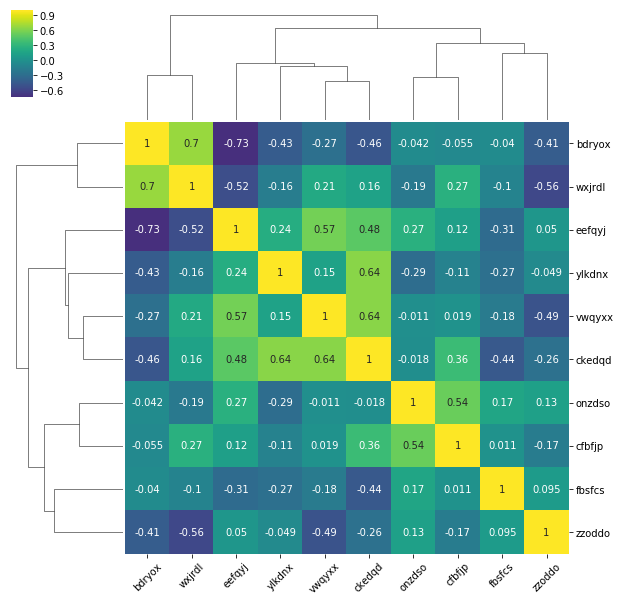

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

g=sns.clustermap(df.corr(), center=0, annot = True, cmap="viridis", figsize=(10, 10))
ylabels=g.ax_heatmap.get_yticklabels()
g.ax_heatmap.set_yticklabels(g.ax_heatmap.get_yticklabels(), rotation=0)
g.ax_heatmap.set_xticklabels(g.ax_heatmap.get_yticklabels(), rotation=45)

**3**. (50 points)

We will use the REST API at `https://swapi.co/api` to find out more information about the people with IDs 1,2 and 3.
    
- Use the `requests` library to get information about these 3 people in JSON format
- Store the information in a pandas data frame
- Add two columns `bmi` and `obese` 
    - `bmi` is mass in kg/(height in meters)^2
    - `obese` is true if `bmi` > 30 and false otherwise
- Convert the data frame to a "tidy" data frame by ensuring there is only one value in each cell
- Replace URLs in each cell in the `homeworld`, `films`, `species`, `vehicles` and `starships` columns with the `title` (for the films column) or the `name` (for every other column) which you can find by a REST lookup at `https://swapi.co/api`
- Minimize the number of REST requests made either by caching results or ensuring only unique lookups

The final data frame should look like the one below.

In [14]:
df = pd.read_csv('starwars.csv')

In [15]:
df.iloc[0]

name                          Luke Skywalker
height                                   172
mass                                      77
hair_color                             blond
skin_color                              fair
eye_color                               blue
birth_year                             19BBY
gender                                  male
homeworld                           Tatooine
films                The Empire Strikes Back
species                                Human
vehicles                         Snowspeeder
starships                             X-wing
created          2014-12-09T13:50:51.644000Z
edited           2014-12-20T21:17:56.891000Z
url           https://swapi.co/api/people/1/
bmi                                  26.0276
obese                                  False
Name: 0, dtype: object

In [16]:
df.iloc[-1]

name                                   C-3PO
height                                   167
mass                                      75
hair_color                               NaN
skin_color                              gold
eye_color                             yellow
birth_year                            112BBY
gender                                   NaN
homeworld                           Tatooine
films                     The Phantom Menace
species                                Droid
vehicles                                 NaN
starships                                NaN
created          2014-12-10T15:10:51.357000Z
edited           2014-12-20T21:17:50.309000Z
url           https://swapi.co/api/people/2/
bmi                                  26.8923
obese                                  False
Name: 21, dtype: object

In [17]:
import sys
import requests
import pandas as pd
import numpy as np
import json
from pandas.io.json import json_normalize

def url(df, column):
    #Function replaces URL with a corresponding value. For example, it replaces url for species column for Luke Skywalker with value Human.
    for index, link in enumerate(df[column]):
        if pd.isnull(df[column][index]): #If the cell is empty, the value in a table remains 'NaN'
            pass
        elif len(df[column][index])==0:
            pass
        else:
            result = [x.strip() for x in link.split(',')] #If cell contains a list with multiple values, we split it comma, so each link in a list could be replaced.
            current=[]
            for unit in result:
                value=requests.get(unit).json()
                name=list(value.values())[0] 
                current.append(name)
            df[column][index]=current
    return df

def extract(column):
    #Extracting values from a list format to a string.
    for index, value in enumerate(df[column]): 
        value=','.join(value)
        df[column][index]=value
        
index=[1,2,3]
df=pd.DataFrame()
for i in index:
    link='https://swapi.co/api/people/'+str(i) 
    info=pd.DataFrame(json_normalize(requests.get(link).json()))
    df=df.append(info) #Initial dataframe with information about people with IDs=[1,2,3]
df=df.reset_index(drop=True)

df.height = df.height.astype(int)
df.mass = df.mass.astype(int) 

df['bmi']=df['mass']/((df['height']/100)**2) #Calculating BMI column.
df['obese']=df['bmi'].apply(lambda x: True if x>30 else False) #Setting values for obese column.

columns=['species','films','vehicles','starships']
for i in columns:
    extract(i)

columns=['homeworld','species','films','vehicles','starships']    

for column in columns:
    url(df,column)
    
for i in columns:
    df=df.explode(i)

df=(df.drop_duplicates()).reset_index(drop=True)

df['name'] = pd.Categorical(df['name'], ["Luke Skywalker", "R2-D2", "C-3PO"])
df=df.sort_values(by='name') #Sorting values by 'name' column to ensure the table look provided in the instructions.
df=df.reset_index(drop=True)

#Because all links were replaced before converting the data frame to its 'tidy' version, the number of API requests was minimized without the necessity to cash it.

/Users/iuliia/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/iuliia/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [18]:
df.iloc[0]

name                          Luke Skywalker
height                                   172
mass                                      77
hair_color                             blond
skin_color                              fair
eye_color                               blue
birth_year                             19BBY
gender                                  male
homeworld                           Tatooine
films                The Empire Strikes Back
species                                Human
vehicles                         Snowspeeder
starships                             X-wing
created          2014-12-09T13:50:51.644000Z
edited           2014-12-20T21:17:56.891000Z
url           https://swapi.co/api/people/1/
bmi                                  26.0276
obese                                  False
Name: 0, dtype: object

In [19]:
df.iloc[-1]

name                                   C-3PO
height                                   167
mass                                      75
hair_color                               n/a
skin_color                              gold
eye_color                             yellow
birth_year                            112BBY
gender                                   n/a
homeworld                           Tatooine
films                   Attack of the Clones
species                                Droid
vehicles                                    
starships                                   
created          2014-12-10T15:10:51.357000Z
edited           2014-12-20T21:17:50.309000Z
url           https://swapi.co/api/people/2/
bmi                                  26.8923
obese                                  False
Name: 32, dtype: object